In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [4]:
USA = pd.read_csv('US_Accidents_Dec19.csv')

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
USA.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [7]:
# USA_2019['Distance(mi)'].value_counts()

In [8]:
USA['Weather_Timestamp'] =  pd.to_datetime(USA['Weather_Timestamp'])
USA['Weather_Timestamp'].head()

0   2016-02-08 05:58:00
1   2016-02-08 05:51:00
2   2016-02-08 06:56:00
3   2016-02-08 07:38:00
4   2016-02-08 07:53:00
Name: Weather_Timestamp, dtype: datetime64[ns]

In [9]:
var = USA['Weather_Timestamp'].astype('str')

In [10]:
var.head()

0    2016-02-08 05:58:00
1    2016-02-08 05:51:00
2    2016-02-08 06:56:00
3    2016-02-08 07:38:00
4    2016-02-08 07:53:00
Name: Weather_Timestamp, dtype: object

In [11]:
var.str[:4]

0          2016
1          2016
2          2016
3          2016
4          2016
           ... 
2974330    2019
2974331    2019
2974332    2019
2974333    2019
2974334    2019
Name: Weather_Timestamp, Length: 2974335, dtype: object

In [12]:
USA['Date'] = var.str[:4]

In [13]:
USA.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Date'],
      dtype='object')

In [14]:
USA['Date']

0          2016
1          2016
2          2016
3          2016
4          2016
           ... 
2974330    2019
2974331    2019
2974332    2019
2974333    2019
2974334    2019
Name: Date, Length: 2974335, dtype: object

In [15]:
USA['Start_Time'] =  pd.to_datetime(USA['Start_Time'])
USA['Start_Time'].head()

0   2016-02-08 05:46:00
1   2016-02-08 06:07:59
2   2016-02-08 06:49:27
3   2016-02-08 07:23:34
4   2016-02-08 07:39:07
Name: Start_Time, dtype: datetime64[ns]

In [16]:
USA['End_Time'] =  pd.to_datetime(USA['End_Time'])
USA['End_Time'].head()

0   2016-02-08 11:00:00
1   2016-02-08 06:37:59
2   2016-02-08 07:19:27
3   2016-02-08 07:53:34
4   2016-02-08 08:09:07
Name: End_Time, dtype: datetime64[ns]

In [17]:
USA['Time_Lapse'] = (USA['End_Time'] - USA['Start_Time'])
USA['Time_Lapse'].head(10)

0   05:14:00
1   00:30:00
2   00:30:00
3   00:30:00
4   00:30:00
5   00:30:00
6   00:30:00
7   00:30:00
8   00:30:00
9   00:30:00
Name: Time_Lapse, dtype: timedelta64[ns]

In [18]:
USA['Time_Lapse'] = USA['Time_Lapse'].astype(int)
USA['Time_Lapse'].head(10)

0    18840000000000
1     1800000000000
2     1800000000000
3     1800000000000
4     1800000000000
5     1800000000000
6     1800000000000
7     1800000000000
8     1800000000000
9     1800000000000
Name: Time_Lapse, dtype: int64

In [19]:
USA['Time_Lapse'] = USA['Time_Lapse'].div(60000000000)

In [20]:
USA_2019 = USA[USA['Date'] == '2019']
USA['Time_Lapse'].isnull().sum()

0

In [21]:
USA_2019.shape

(941940, 51)

In [22]:
USA_2019 = USA_2019.drop(columns = ['End_Lat', 'End_Lng'], axis=1)

In [23]:
USA_2019.shape

(941940, 49)

In [24]:
USA_2019 = USA_2019.dropna()

In [25]:
USA_2019.shape

(212169, 49)

In [26]:
# checking range of data

max_time = USA_2019['Time_Lapse'].max()
min_time = USA_2019['Time_Lapse'].min()

min_time, max_time

(-30.316666666666666, 121960.83333333333)

In [27]:
mu = USA_2019['Time_Lapse'].mean()
mu

80.06575308677427

In [28]:
median_2019 = USA_2019['Time_Lapse'].median()
median_2019

65.95

In [29]:
USA_2019['Time_Lapse'].describe()

count    212169.000000
mean         80.065753
std         405.638884
min         -30.316667
25%          50.033333
50%          65.950000
75%          91.300000
max      121960.833333
Name: Time_Lapse, dtype: float64

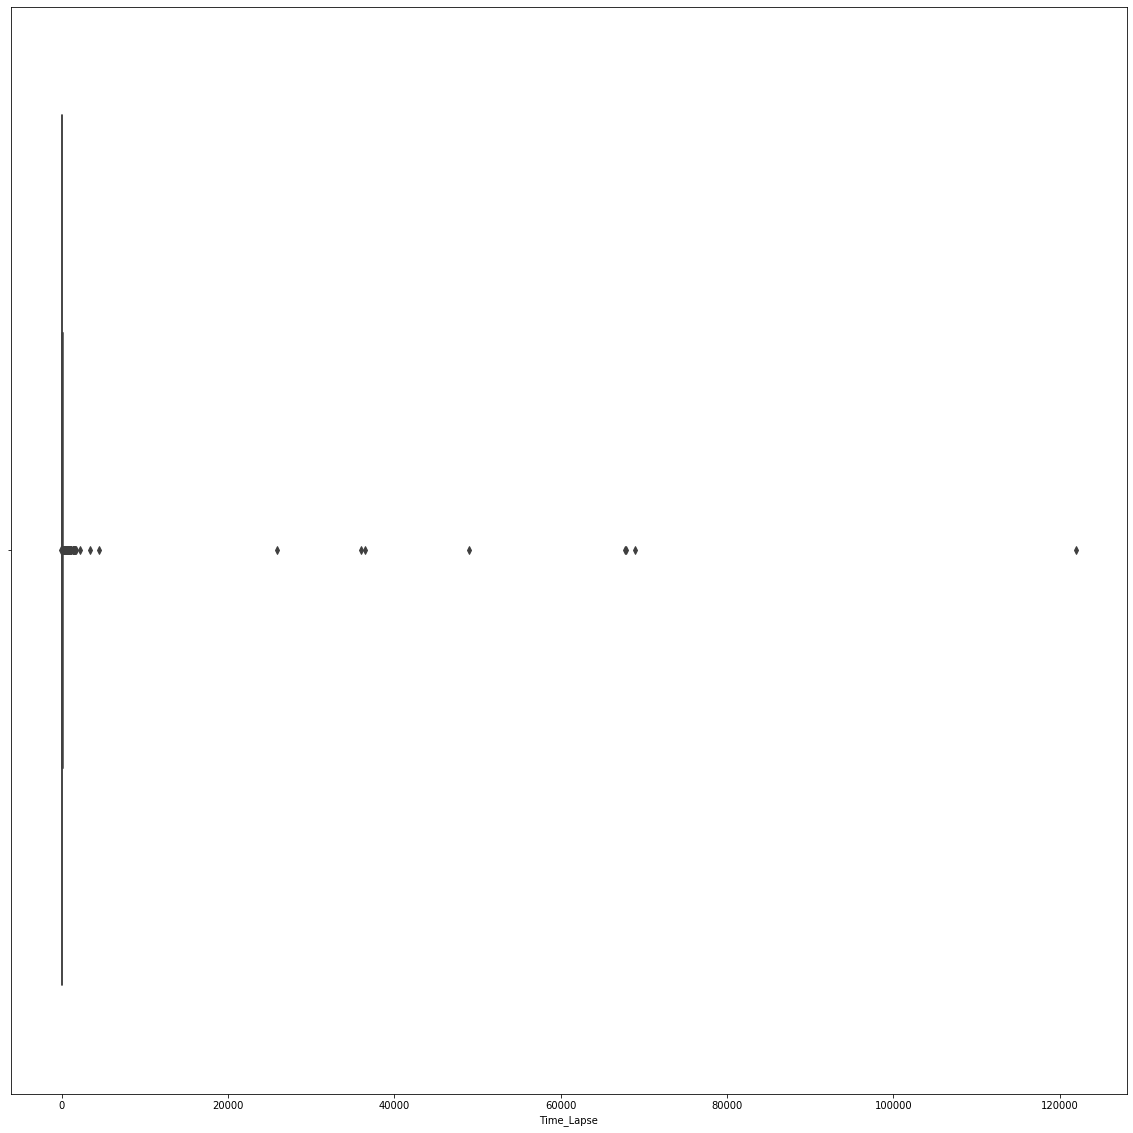

In [30]:
plt.figure(figsize=(20,20))

sns.boxplot(x=USA_2019['Time_Lapse'])
plt.show()

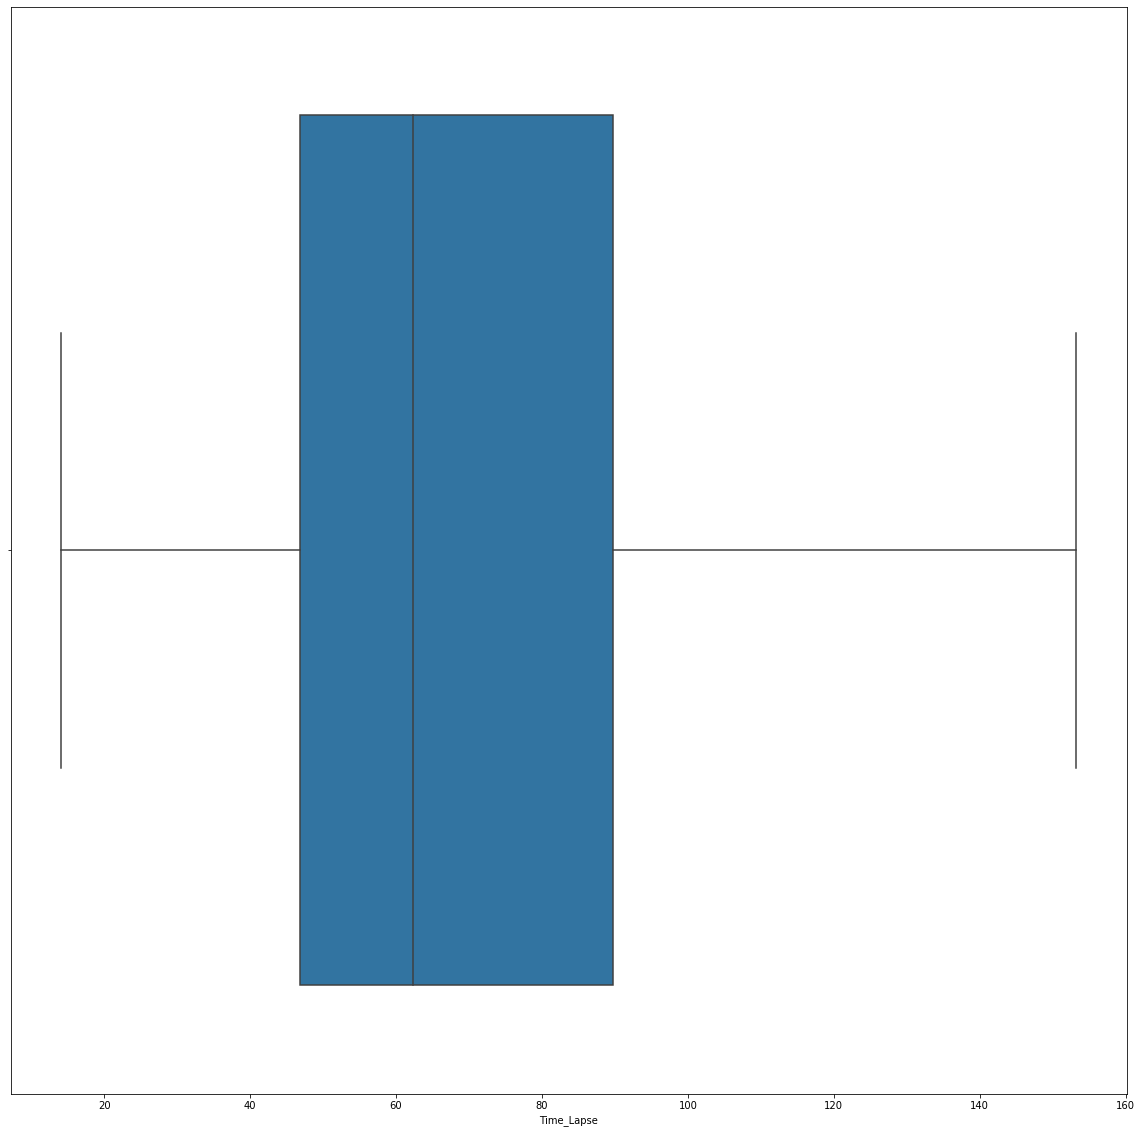

In [36]:
plt.figure(figsize=(20,20))

sns.boxplot(x=USA_2019['Time_Lapse'])
plt.show()

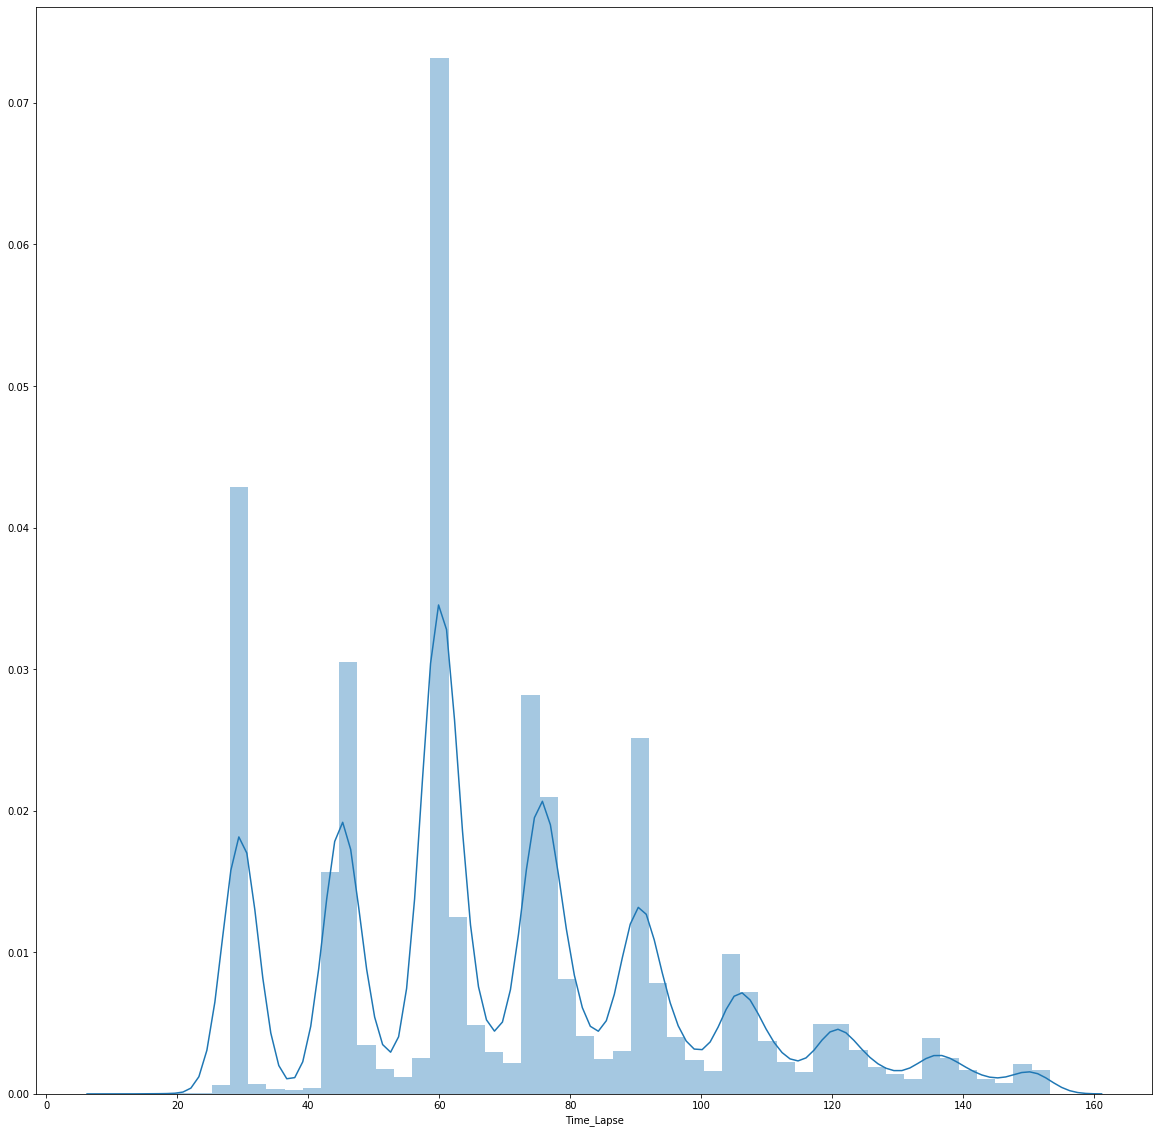

In [37]:
plt.figure(figsize=(20,20))
sns.distplot(USA_2019['Time_Lapse'])

In [34]:
USA_2019.describe()

,TMC,Severity,Start_Lat,Start_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Time_Lapse
count,201272.000000,201272.000000,201272.000000,201272.000000,201272.000000,201272.000000,201272.000000,201272.000000,201272.000000,201272.000000,201272.000000,201272.00000,201272.000000,201272.000000
mean,205.549883,2.062517,35.884449,-90.238267,0.080209,4772.149450,66.047006,65.141242,66.686529,29.348489,9.143180,7.02716,0.004998,70.690753
std,16.165496,0.246728,4.725077,13.977922,0.889003,9814.435015,18.155164,19.880805,21.622090,0.930935,2.514795,5.19936,0.068909,28.626987
min,201.000000,1.000000,24.555269,-124.534439,0.000000,1.000000,-23.100000,-52.700000,3.000000,20.200000,0.000000,0.00000,0.000000,14.133333
25%,201.000000,2.000000,33.000591,-97.502192,0.000000,791.000000,54.000000,54.000000,51.000000,29.140000,10.000000,3.00000,0.000000,46.850000
50%,201.000000,2.000000,35.231972,-84.590099,0.000000,2498.000000,69.000000,69.000000,69.000000,29.520000,10.000000,7.00000,0.000000,62.333333
75%,201.000000,2.000000,39.783719,-80.711540,0.000000,6099.000000,80.000000,80.000000,85.000000,29.880000,10.000000,10.00000,0.000000,89.716667
max,406.000000,4.000000,49.002201,-69.973808,123.209999,990415.000000,115.000000,115.000000,100.000000,30.730000,80.000000,230.00000,25.000000,153.200000


In [35]:
corr = USA_2019.corr()
corr['Time_Lapse']

TMC                  0.044265
Severity            -0.027365
Start_Lat           -0.033539
Start_Lng            0.012650
Distance(mi)         0.008513
Number               0.014477
Temperature(F)       0.087847
Wind_Chill(F)        0.093251
Humidity(%)         -0.037194
Pressure(in)        -0.005603
Visibility(mi)       0.051426
Wind_Speed(mph)     -0.010622
Precipitation(in)   -0.001838
Amenity             -0.001167
Bump                -0.003080
Crossing            -0.010357
Give_Way             0.001725
Junction            -0.006061
No_Exit             -0.009942
Railway              0.007168
Roundabout          -0.002564
Station              0.000857
Stop                -0.005646
Traffic_Calming     -0.003728
Traffic_Signal       0.009023
Turning_Loop              NaN
Time_Lapse           1.000000
Name: Time_Lapse, dtype: float64

In [39]:
USA2_2019 = USA_2019

In [40]:
USA2_2019['Time_Squared'] = USA2_2019['Time_Lapse']**2
USA2_2019.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date,Time_Lapse,Time_Squared
512232,A-512238,MapQuest,201.0,2,2019-12-25 18:05:59,2019-12-25 19:11:09,42.967209,-83.671837,0.000000,Accident on Saginaw St at Judd Rd.,1561.0,E Judd Rd,L,Burton,Genesee,20,48529-2005,US,US/Eastern,KFNT,2019-12-25 17:53:00,48.0,46.0,63.0,29.09,10.0,11,5.0,0.0,10,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,2019,65.166667,4246.694444
512234,A-512240,MapQuest,201.0,2,2019-12-25 23:14:22,2019-12-26 01:04:38,43.028240,-83.719643,0.000000,Accident on Milbourne Ave at Clement St.,2401.0,Clement St,L,Flint,Genesee,20,48504-7353,US,US/Eastern,KFNT,2019-12-25 22:53:00,33.0,33.0,89.0,29.15,6.0,0,0.0,0.0,10,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2019,110.266667,12158.737778
512235,A-512241,MapQuest,201.0,2,2019-12-25 00:20:27,2019-12-25 01:32:05,43.093609,-73.528770,0.000000,Lane blocked due to accident on NY-29 both way...,516.0,State Route 29,R,Greenwich,Washington,31,12834-4221,US,US/Eastern,KGFL,2019-12-25 00:53:00,17.0,17.0,88.0,29.86,10.0,0,0.0,0.0,10,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2019,71.633333,5131.334444
512236,A-512242,MapQuest,201.0,3,2019-12-25 16:21:20,2019-12-25 17:05:40,43.327518,-73.684631,1.710000,Accident on exit ramp from I-87 Southbound at ...,72.0,Abbey Ln,L,Queensbury,Warren,31,12804,US,US/Eastern,KGFL,2019-12-25 15:53:00,33.0,33.0,54.0,29.77,10.0,0,0.0,0.0,10,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2019,44.333333,1965.444444
512237,A-512243,MapQuest,201.0,3,2019-12-25 07:13:20,2019-12-25 09:37:22,42.393494,-73.826744,17.200001,Accident on I-87 Northbound between Exit 21 CR...,12692.0,State Route 9W,R,West Coxsackie,Greene,31,12192-1711,US,US/Eastern,KALB,2019-12-25 06:51:00,22.0,22.0,82.0,29.92,10.0,0,0.0,0.0,51,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,2019,144.033333,20745.601111


In [41]:
usa_sq = USA_2019['Time_Lapse']**2
usa_sq.head()

512232     4246.694444
512234    12158.737778
512235     5131.334444
512236     1965.444444
512237    20745.601111
Name: Time_Lapse, dtype: float64

In [42]:
# fig, ax = plt.subplots(figsize=(16,8))
# ax.scatter(USA_2019['Distance(mi)'], usa_sq)
# ax.
# ax.set_xlabel('Distance Affected')
# ax.set_ylabel('Amount of Delay Time an Accident Caused')
# plt.show()

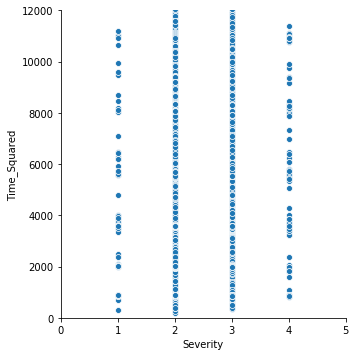

In [43]:
g= sns.relplot(x="Severity", y='Time_Squared', data=USA2_2019)
#set the x lim and y lim
g.set(xlim=(0, 5))
g.set(ylim=(0,12000))

In [34]:
timelapseQ1 = USA_2019['Time_Lapse'].quantile(0.25)
timelapseQ3 = USA_2019['Time_Lapse'].quantile(0.75)
IQR = timelapseQ3 - timelapseQ1
print(IQR)

41.266666666666666


In [35]:
# dropped outliers using IQR

USA_2019 = USA_2019[~((USA_2019['Time_Lapse'] < (timelapseQ1 - 1.5 * IQR)) |(USA_2019['Time_Lapse'] > (timelapseQ3 + 1.5 * IQR)))]
USA_2019.shape

(201272, 49)

/Users/mcerow/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/mcerow/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


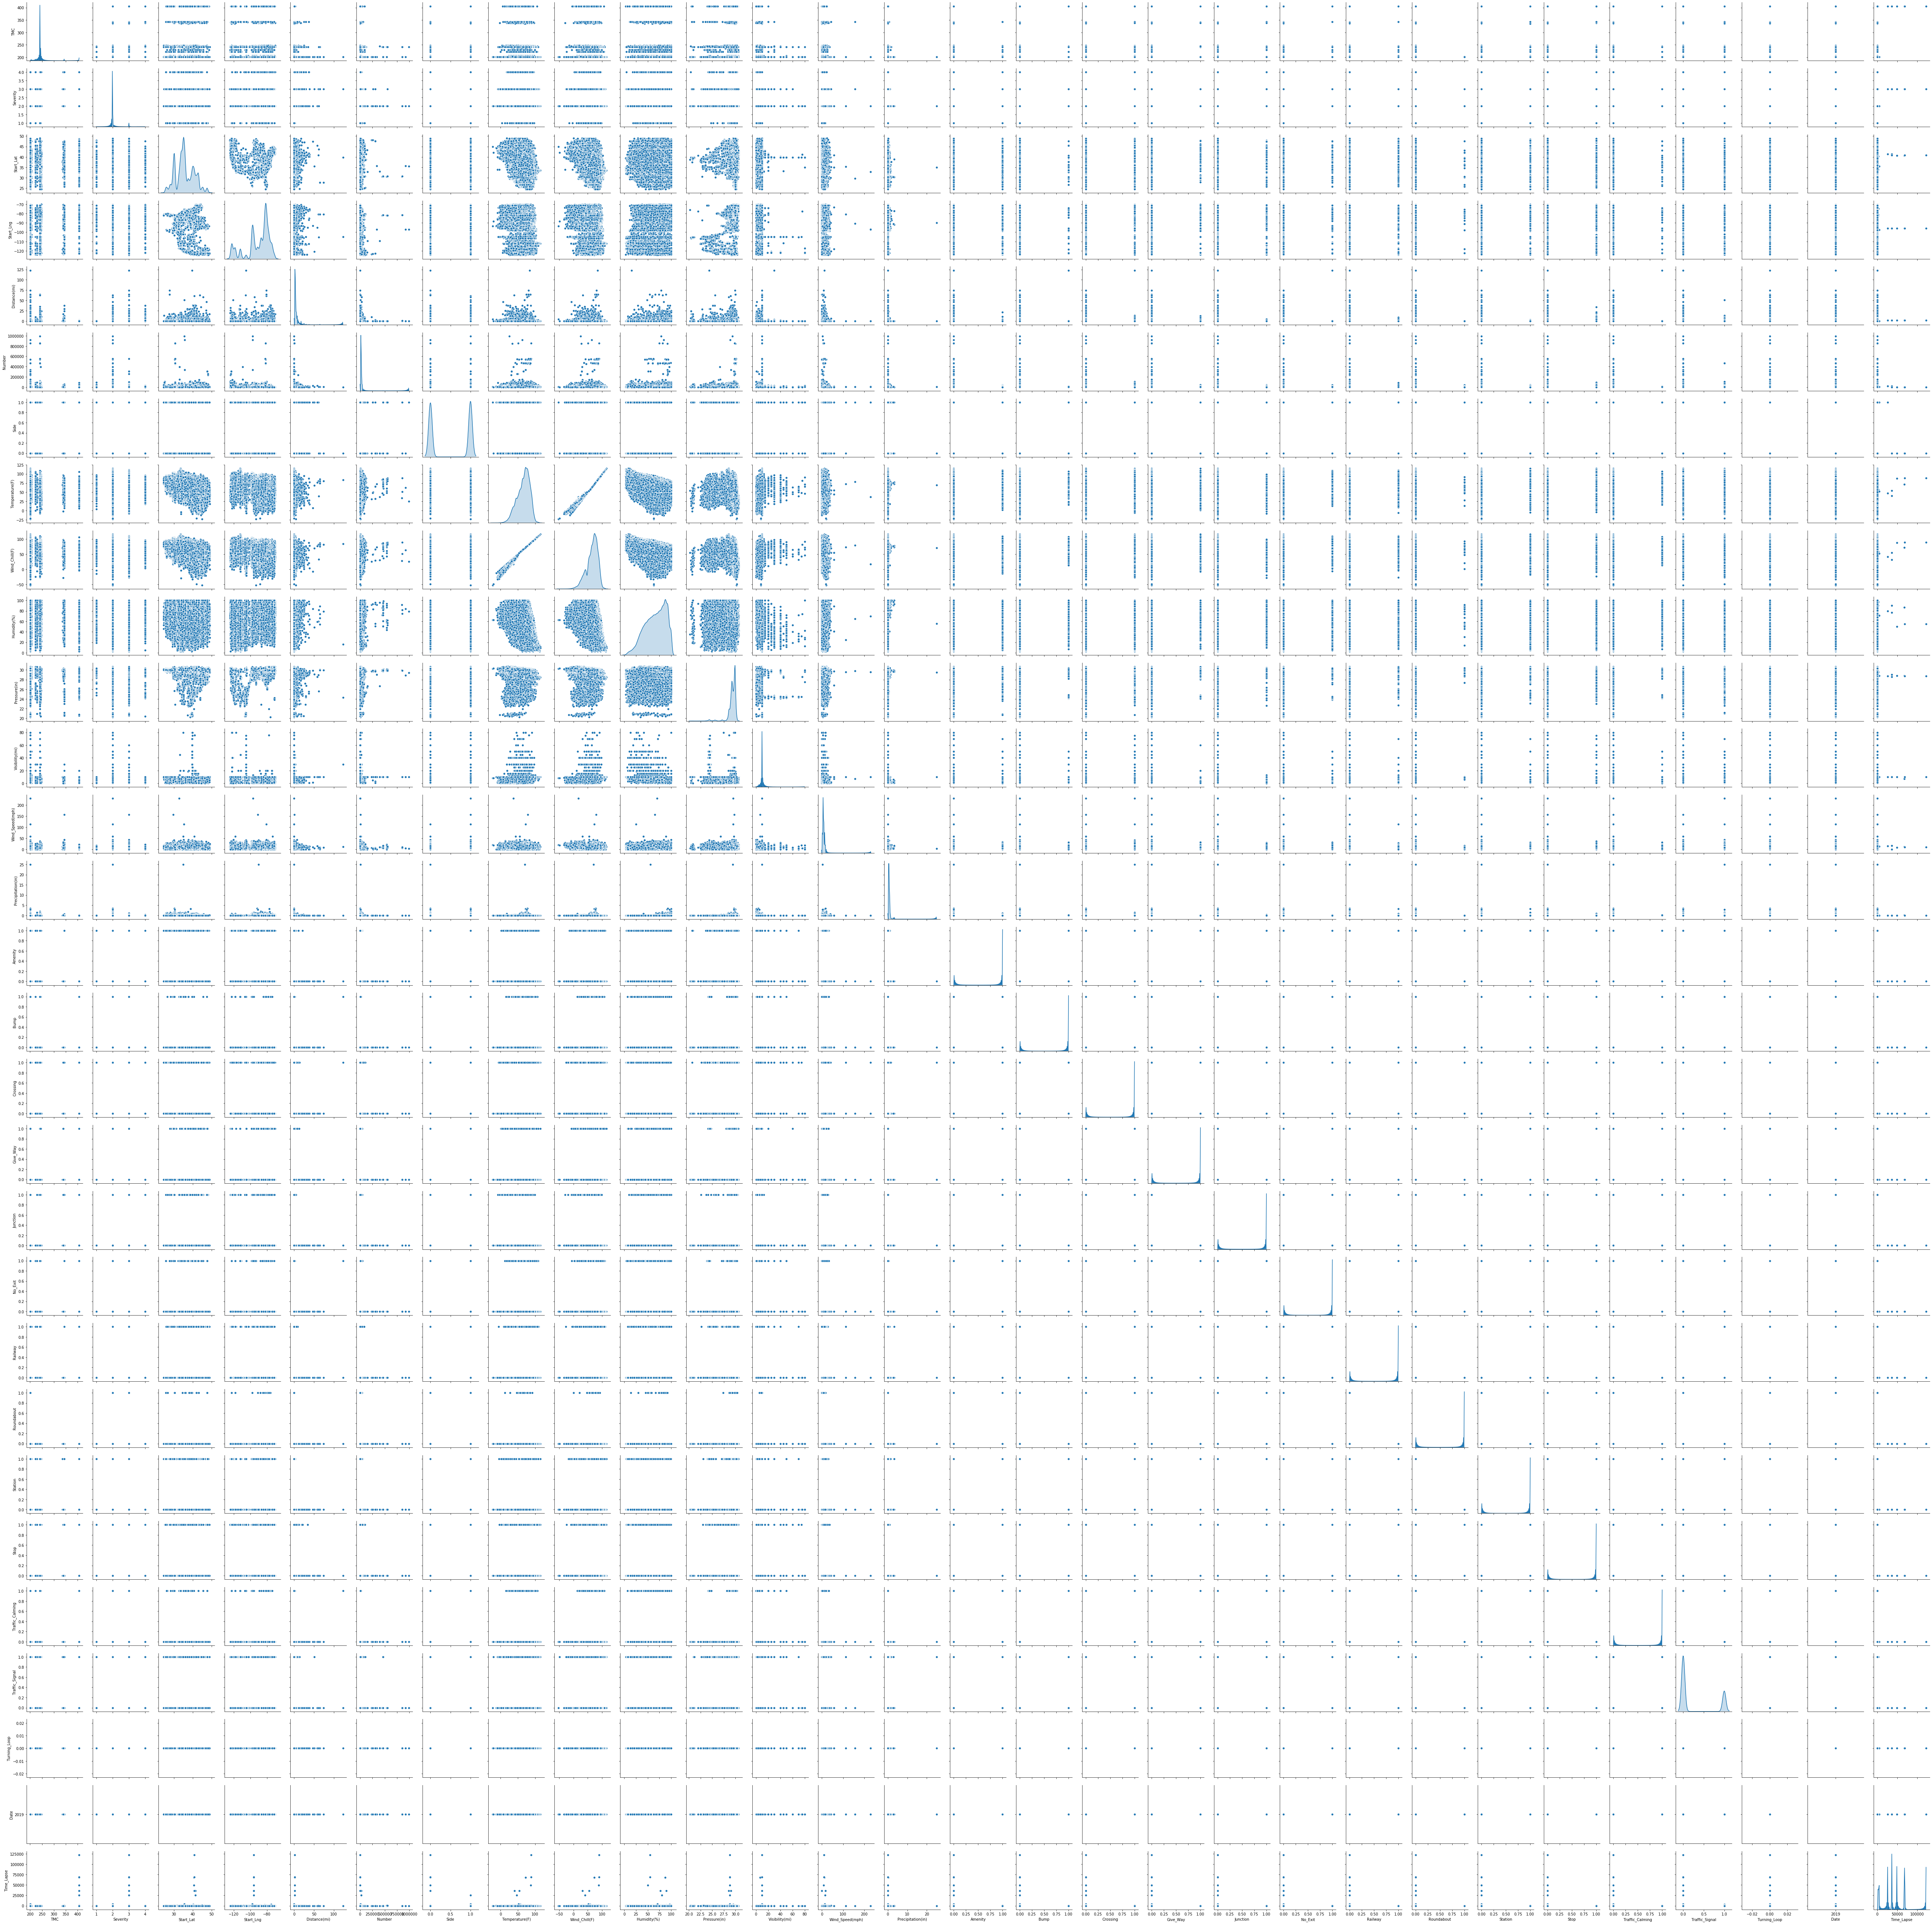

In [56]:
sns.pairplot(USA_2019, diag_kind="kde", height=2.5)

In [92]:
USA_2019['Time_Lapse'].value_counts()

59.783333    2333
59.766667    2276
59.800000    2213
59.750000    2124
59.733333    1888
             ... 
34.466667       1
34.500000       1
32.750000       1
40.116667       1
35.650000       1
Name: Time_Lapse, Length: 7405, dtype: int64

In [95]:
USA_2019['Time_Lapse'].describe()

count    201272.000000
mean         70.690753
std          28.626987
min          14.133333
25%          46.850000
50%          62.333333
75%          89.716667
max         153.200000
Name: Time_Lapse, dtype: float64

In [40]:
time_corr = USA_2019.corr()
time_corr['Time_Lapse']

TMC                  0.044265
Severity            -0.027365
Start_Lat           -0.033539
Start_Lng            0.012650
Distance(mi)         0.008513
Number               0.014477
Temperature(F)       0.087847
Wind_Chill(F)        0.093251
Humidity(%)         -0.037194
Pressure(in)        -0.005603
Visibility(mi)       0.051426
Wind_Speed(mph)     -0.010622
Precipitation(in)   -0.001838
Amenity             -0.001167
Bump                -0.003080
Crossing            -0.010357
Give_Way             0.001725
Junction            -0.006061
No_Exit             -0.009942
Railway              0.007168
Roundabout          -0.002564
Station              0.000857
Stop                -0.005646
Traffic_Calming     -0.003728
Traffic_Signal       0.009023
Turning_Loop              NaN
Time_Lapse           1.000000
Time_Squared         0.975715
Name: Time_Lapse, dtype: float64

In [118]:
USA_2019['Turning_Loop'].describe()

count     201272
unique         1
top        False
freq      201272
Name: Turning_Loop, dtype: object

In [28]:
USA_2019['State'] = USA_2019['State'].astype('category')
USA_2019['State'] = USA_2019['State'].cat.codes
USA_2019['State'].head()

512232    20
512234    20
512235    31
512236    31
512237    31
Name: State, dtype: int8

In [53]:
USA_2019[['Sunrise_Sunset','Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']] = USA_2019[['Sunrise_Sunset','Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']].apply(lambda x: x.astype('category').cat.codes)
USA_2019


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date,Time_Lapse,Time_Squared
512232,A-512238,MapQuest,201.0,2,2019-12-25 18:05:59,2019-12-25 19:11:09,42.967209,-83.671837,0.000000,Accident on Saginaw St at Judd Rd.,1561.0,E Judd Rd,1,Burton,Genesee,20,48529-2005,US,US/Eastern,KFNT,2019-12-25 17:53:00,48.0,46.0,63.0,29.09,10.0,11,5.0,0.0,10,False,False,False,False,False,False,False,False,False,False,False,False,False,1,1,0,0,2019,65.166667,4246.694444
512234,A-512240,MapQuest,201.0,2,2019-12-25 23:14:22,2019-12-26 01:04:38,43.028240,-83.719643,0.000000,Accident on Milbourne Ave at Clement St.,2401.0,Clement St,1,Flint,Genesee,20,48504-7353,US,US/Eastern,KFNT,2019-12-25 22:53:00,33.0,33.0,89.0,29.15,6.0,0,0.0,0.0,10,False,False,False,False,False,False,False,False,False,False,False,False,False,1,1,1,1,2019,110.266667,12158.737778
512235,A-512241,MapQuest,201.0,2,2019-12-25 00:20:27,2019-12-25 01:32:05,43.093609,-73.528770,0.000000,Lane blocked due to accident on NY-29 both way...,516.0,State Route 29,0,Greenwich,Washington,31,12834-4221,US,US/Eastern,KGFL,2019-12-25 00:53:00,17.0,17.0,88.0,29.86,10.0,0,0.0,0.0,10,False,False,False,False,False,False,False,False,False,False,False,False,False,1,1,1,1,2019,71.633333,5131.334444
512236,A-512242,MapQuest,201.0,3,2019-12-25 16:21:20,2019-12-25 17:05:40,43.327518,-73.684631,1.710000,Accident on exit ramp from I-87 Southbound at ...,72.0,Abbey Ln,1,Queensbury,Warren,31,12804,US,US/Eastern,KGFL,2019-12-25 15:53:00,33.0,33.0,54.0,29.77,10.0,0,0.0,0.0,10,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,2019,44.333333,1965.444444
512237,A-512243,MapQuest,201.0,3,2019-12-25 07:13:20,2019-12-25 09:37:22,42.393494,-73.826744,17.200001,Accident on I-87 Northbound between Exit 21 CR...,12692.0,State Route 9W,0,West Coxsackie,Greene,31,12192-1711,US,US/Eastern,KALB,2019-12-25 06:51:00,22.0,22.0,82.0,29.92,10.0,0,0.0,0.0,51,False,False,False,False,False,False,False,False,False,False,False,False,False,1,0,0,0,2019,144.033333,20745.601111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203547,A-1203561,MapQuest,241.0,2,2019-01-30 15:16:36,2019-01-30 15:46:18,30.401581,-86.879707,0.000000,Turn lane blocked due to accident on US-98 Nav...,8191.0,Navarre Pkwy,1,Navarre,Santa Rosa,8,32566-6941,US,US/Central,KNFJ,2019-01-30 14:56:00,50.0,47.0,27.0,30.21,10.0,7,8.0,0.0,46,False,False,False,False,False,False,False,False,False,False,False,True,False,0,0,0,0,2019,29.700000,882.090000
1203575,A-1203589,MapQuest,241.0,2,2019-01-30 17:51:55,2019-01-30 18:21:32,34.449379,-86.914917,0.000000,Lane blocked due to accident on AL-36 Main St ...,1150.0,Main St E,1,Hartselle,Morgan,0,35640-2020,US,US/Central,K3A1,2019-01-30 17:53:00,32.0,26.0,45.0,29.61,10.0,8,6.0,0.0,10,False,False,False,False,False,False,False,False,False,False,False,False,False,1,1,0,0,2019,29.616667,877.146944
1203589,A-1203603,MapQuest,201.0,2,2019-01-30 07:27:36,2019-01-30 07:57:25,35.994961,-86.624359,0.000000,Accident on Battle Rd at Burkitt Rd.,498.0,Battle Rd,0,Antioch,Davidson,38,37013-4810,US,US/Central,KBNA,2019-01-30 07:11:00,21.9,13.4,75.0,30.26,5.0,20,6.9,0.0,37,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,2019,29.816667,889.033611
1203591,A-1203605,MapQuest,201.0,2,2019-01-30 07:51:29,2019-01-30 08:21:19,36.049301,-86.599991,0.000000,Accident on TN-171

In [30]:
USA_2019['Weather_Condition'] = USA_2019['Weather_Condition'].astype('category').cat.codes

In [29]:
USA_2019['Wind_Direction'] = USA_2019['Wind_Direction'].astype('category').cat.codes

USA_2019['Wind_Direction'].head()

512232    11
512234     0
512235     0
512236     0
512237     0
Name: Wind_Direction, dtype: int8

In [31]:
time_corr['Time_Lapse']

NameError: name 'time_corr' is not defined

In [44]:
USA_2019['Side'] = np.where(USA_2019['Side'] == 'R', 0, 1)
# converting R to 0 and L to 1

In [45]:
USA_2019['Side'].head()

512232    1
512234    1
512235    0
512236    1
512237    0
Name: Side, dtype: int64

In [46]:
USA_2019['County'].describe()

count          201272
unique           1081
top       Mecklenburg
freq             9559
Name: County, dtype: object

In [47]:
USA_2019.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Description', 'Number',
       'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country',
       'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Date',
       'Time_Lapse', 'Time_Squared'],
      dtype='object')

In [ ]:
# X = pd.get_dummies(data=USA_2019, drop_first=True)

In [55]:
target = USA_2019['Time_Lapse']

In [54]:
features = USA_2019[['Severity','Start_Lat','Start_Lng','Side', 'State', 'Temperature(F)','Humidity(%)', 'Pressure(in)', 
                     'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)','Visibility(mi)','Wind_Direction', 'Wind_Speed(mph)',
                    'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction',
                    'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset',
                     'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']]








In [56]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=34,test_size=0.2)

In [51]:
X_train.head()

,Severity,Start_Lat,Start_Lng,Side,State,Temperature(F),Humidity(%),Pressure(in),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
937719,2,39.595039,-104.757347,0,4,49.0,64.0,24.21,47.0,64.0,24.21,10.0,11,6.0,0.0,10,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
759058,2,32.858170,-79.971687,1,37,82.0,71.0,30.01,82.0,71.0,30.01,10.0,11,10.0,0.0,46,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
830610,2,34.805641,-82.227287,1,37,90.0,49.0,29.04,90.0,49.0,29.04,10.0,21,6.0,0.0,10,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
521441,2,40.622429,-80.070061,0,35,33.0,92.0,28.28,27.0,92.0,28.28,10.0,21,7.0,0.0,5,False,False,False,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day
790070,2,36.265820,-86.711029,0,38,92.0,47.0,29.27,92.0,47.0,29.27,10.0,7,10.0,0.0,46,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [57]:
model = sm.OLS(y_train,X_train.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Time_Lapse   R-squared (uncentered):                   0.861
Model:                            OLS   Adj. R-squared (uncentered):              0.861
Method:                 Least Squares   F-statistic:                          3.314e+04
Date:                Wed, 25 Mar 2020   Prob (F-statistic):                        0.00
Time:                        15:14:21   Log-Likelihood:                     -7.6775e+05
No. Observations:              161017   AIC:                                  1.536e+06
Df Residuals:                  160987   BIC:                                  1.536e+06
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Severity                 -1.2799      0.285     -4.484      0.000      -1.839      -0.720
Start_Lat                 0.1998      0.016     12.476      0.000       0.168       0.231
Start_Lng                -0.0287      0.005     -5.555      0.000      -0.039      -0.019
Side                      0.0487      0.142      0.343      0.732      -0.230       0.327
State                     0.0297      0.005      5.432      0.000       0.019       0.040
Temperature(F)           -0.6705      0.044    -15.294      0.000      -0.756      -0.585
Humidity(%)               0.0028      0.002      1.358      0.175      -0.001       0.007
Pressure(in)              0.9027      0.019     47.953      0.000       0.866       0.940
Wind_Chill(F)             0.7549      0.040     18.966      0.000       0.677       0.833
Humidity(%)               0.0028      0.002      1.358      0.175      -0.001       0.007
Pressure(in)              0.9027      0.019     47.953      0.000       0.866       0.940
Visibility(mi)            0.4782      0.031     15.298      0.000       0.417       0.539
Wind_Direction            0.0069      0.011      0.600      0.548      -0.016       0.029
Wind_Speed(mph)           0.0691      0.016      4.229      0.000       0.037       0.101
Precipitation(in)         2.0421      0.971      2.104      0.035       0.139       3.945
Weather_Condition        -0.0149      0.004     -3.811      0.000      -0.023      -0.007
Amenity                  -0.4400      0.461     -0.955      0.340      -1.343       0.463
Bump                     -0.2005      4.919     -0.041      0.967      -9.842       9.441
Crossing                 -1.4581      0.245     -5.952      0.000      -1.938      -0.978
Give_Way                  1.4393      1.590      0.905      0.365      -1.676       4.555
Junction                 -2.0718      1.277     -1.622      0.105      -4.575       0.431
No_Exit                  -4.4032      1.521     -2.895      0.004      -7.385      -1.422
Railway                   2.2155      0.649      3.412      0.001       0.943       3.488
Roundabout               -0.6592      7.012     -0.094      0.925     -14.403      13.084
Station                  -0.2936      0.398     -0.738      0.460      -1.073       0.486
Stop                     -0.4459      0.410     -1.088      0.276      -1.249       0.357
Traffic_Calming          -1.7330      3.846     -0.451      0.652      -9.270       5.804
Traffic_Signal            1.0343      0.178      5.796      0.000       0.685       1.384
Sunrise_Sunset            1.2344      0.335      3.686      0.000       0.578       1.891
Civil_Twilight            0.3772      0.460      0.820      0.412      -0.524       1.278
Nautical_Twili

In [58]:
ypred = model.predict(X_test)


In [60]:
residual = ypred - y_test

In [90]:
print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, ypred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, ypred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, ypred))))

Mean Absolute Error:22.6726357428814
Mean Squared Error:812.2545504988474
Root Mean Squared Error:28.500079833201298


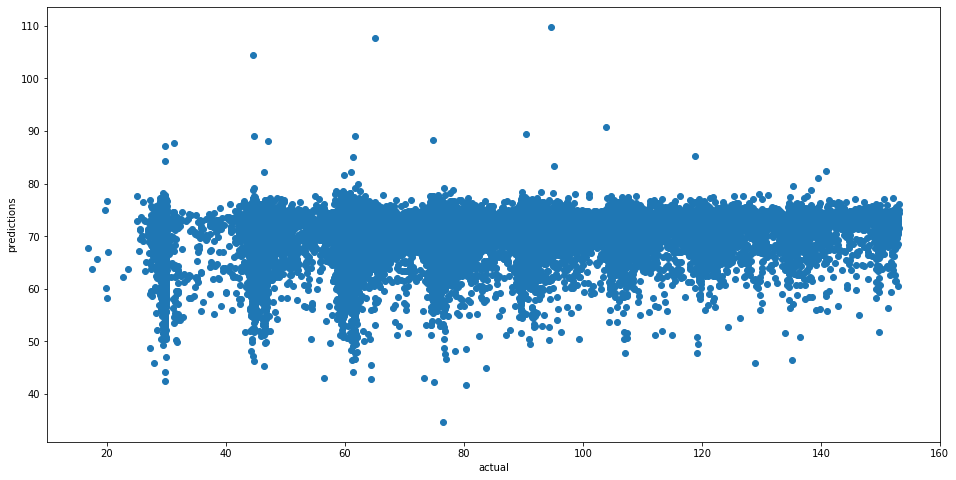

In [62]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(y_test, ypred)

ax.set_xlabel('actual')
ax.set_ylabel('predictions')
plt.show()

In [63]:
USA_2019[''].corr()

,TMC,Severity,Start_Lat,Start_Lng,Distance(mi),Number,Side,State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Time_Lapse,Time_Squared
TMC,1.000000,0.197243,-0.038954,-0.034144,0.053773,0.052836,-0.005405,-0.151191,0.018767,0.019229,-0.001940,0.015434,0.012460,-0.002802,0.007565,0.001572,0.004807,-0.022217,0.002505,-0.024466,0.001643,0.021541,-0.000775,-0.009316,-0.002951,-0.014120,-0.008399,-0.000239,-0.014273,NaN,0.013094,0.015296,0.015674,0.015055,0.044265,0.049998
Severity,0.197243,1.000000,0.020357,-0.020177,0.149211,-0.010753,-0.012784,-0.042133,-0.002087,-0.003697,-0.008574,0.003589,-0.000729,0.013245,0.036894,0.009694,0.023810,-0.026466,0.016526,-0.056841,0.004518,0.067447,0.011494,-0.017962,-0.000825,-0.036915,-0.033560,0.010959,-0.100604,NaN,0.031144,0.036913,0.038131,0.037545,-0.027365,-0.016329
Start_Lat,-0.038954,0.020357,1.000000,-0.004842,0.048506,-0.033621,-0.011965,0.117641,-0.419511,-0.418846,0.040940,-0.174011,-0.077696,0.100949,0.052840,-0.006333,-0.019199,0.081370,0.009166,0.032541,0.007670,0.018153,0.000996,-0.006139,0.004446,0.050373,0.024227,0.015407,-0.021641,NaN,0.039628,0.032236,0.021958,0.018777,-0.033539,-0.034569
Start_Lng,-0.034144,-0.020177,-0.004842,1.000000,-0.003211,-0.165858,0.000224,0.287709,-0.032987,-0.039226,0.197272,0.279561,-0.057515,-0.006251,0.019063,0.013441,0.035280,-0.039108,-0.027854,-0.108500,-0.001535,-0.027807,-0.031314,-0.022339,-0.002835,-0.020268,-0.118510,-0.030579,-0.030170,NaN,-0.036456,-0.042961,-0.050704,-0.061022,0.012650,0.001383
Distance(mi),0.053773,0.149211,0.048506,-0.003211,1.000000,0.018769,-0.000957,-0.004459,-0.028002,-0.028195,0.014142,-0.036422,-0.002636,-0.001157,0.001470,0.002105,0.003412,-0.011357,0.029624,-0.024519,0.003865,0.004719,0.012557,-0.005892,-0.000891,-0.014305,-0.003761,0.022355,-0.039161,NaN,0.017209,0.015869,0.015384,0.013862,0.008513,0.012605
Number,0.052836,-0.010753,-0.033621,-0.165858,0.018769,1.000000,0.008190,-0.115567,-0.002535,-0.001600,0.003040,-0.023770,0.006055,-0.012575,-0.007741,-0.002247,-0.015949,-0.039736,-0.000141,-0.029641,0.002970,0.009152,-0.001125,-0.006591,0.001606,-0.026111,0.013044,-0.002007,-0.019226,NaN,0.028467,0.023376,0.018387,0.015449,0.014477,0.020311
Side,-0.005405,-0.012784,-0.011965,0.000224,-0.000957,0.008190,1.000000,0.001121,0.006649,0.006483,0.001228,-0.004261,-0.000199,-0.000782,0.003264,-0.002273,0.002922,-0.001156,-0.009331,0.005503,0.007395,0.003069,-0.002677,-0.001128,-0.000618,0.000112,-0.000374,-0.005950,0.020714,NaN,-0.003504,-0.004973,-0.004518,-0.003287,-0.001952,-0.001178
State,-0.151191,-0.042133,0.117641,0.287709,-0.004459,-0.115567,0.001121,1.000000,-0.025789,-0.025891,0.073606,0.068323,-0.034065,0.006937,0.033380,0.006155,0.028266,0.042093,-0.012308,-0.037038,0.000219,-0.026668,-0.028477,-0.001945,0.000806,-0.032837,-0.032901,-0.004271,-0.015533,NaN,-0.021664,-0.020548,-0.022702,-0.024788,0.011800,0.001980
Temperature(F),0.018767,-0.002087,-0.419511,-0.032987,-0.028002,-0.002535,0.006649,-0.025789,1.000000,0.994904,-0.385657,0.028601,0.249473,0.109589,0.026966,-0.016881,0.074990,-0.017452,-0.000965,0.028706,-0.004795,-0.013305,0.007838,0.008890,-0.002539,-0.016512,0.005126,-0.002618,0.033507,NaN,-0.274267,-0.232308,-0.193461,-0.163913,0.087847,0.075567
Wind_Chill(F),0.019229,-0.003697,-0.418846,-0.039226,-0.028195,-0.001600,0.006483,-0.025891,0.994904,1.000000,-0.367823,0.028799,0.254963,0.088837,-0.015962,-0.016640,0.061837,-0.016949,-0.000703,0.027554,-0.004779,-0.013043,0.007421,0.009358,-0.002285,-0.016084,0.005224,-0.002037,0.030816,NaN,-0.264287,-0.223419,-0.185320,-0.156684,0.093251,0.079748


In [65]:
correlation_tolerance = 1 - model.rsquared
correlation_tolerance

0.13936686063931514

In [67]:
VIF = 1/correlation_tolerance
VIF

7.175306923128767

In [68]:
"""
We checked our correlation matrix for colinearity and we decided we are going to remove windchill,bump,civil_twilight,nauticaltwilight, astronomical twilight.
"""

'\nWe checked our correlation matrix for colinearity and we decided we are going to remove windchill,bump,civil_twilight,nauticaltwilight, astronomical twilight.\n'

In [69]:
"""now we are going to create a new model with the features list correct for colinearity"""

'now we are going to create a new model with the features list correct for colinearity'

In [72]:
Y = USA_2019['Time_Lapse']

In [76]:
X = USA_2019[['Severity','Start_Lat','Start_Lng', 'State', 'Temperature(F)','Humidity(%)', 'Pressure(in)', 'Humidity(%)', 'Pressure(in)','Visibility(mi)', 'Wind_Speed(mph)',
                    'Precipitation(in)', 'Weather_Condition', 'Crossing',
                    'No_Exit', 'Railway', 'Traffic_Signal', 'Sunrise_Sunset']]

In [82]:
X_train, X_tests, y_train, y_tests = train_test_split(X,Y , random_state=34,test_size=0.2)

In [78]:

Model2 = sm.OLS(y_train,X_train.astype(float)).fit()
Model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Time_Lapse   R-squared (uncentered):                   0.860
Model:                            OLS   Adj. R-squared (uncentered):              0.860
Method:                 Least Squares   F-statistic:                          6.189e+04
Date:                Wed, 25 Mar 2020   Prob (F-statistic):                        0.00
Time:                        16:03:50   Log-Likelihood:                     -7.6803e+05
No. Observations:              161017   AIC:                                  1.536e+06
Df Residuals:                  161001   BIC:                                  1.536e+06
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Severity             -1.4666      0.285     -5.152      0.000      -2.025      -0.909
Start_Lat             0.1982      0.016     12.516      0.000       0.167       0.229
Start_Lng            -0.0287      0.005     -5.582      0.000      -0.039      -0.019
State                 0.0320      0.005      5.862      0.000       0.021       0.043
Temperature(F)        0.1573      0.005     32.646      0.000       0.148       0.167
Humidity(%)           0.0084      0.002      4.173      0.000       0.004       0.012
Pressure(in)          0.8106      0.018     44.797      0.000       0.775       0.846
Humidity(%)           0.0084      0.002      4.173      0.000       0.004       0.012
Pressure(in)          0.8106      0.018     44.797      0.000       0.775       0.846
Visibility(mi)        0.5336      0.031     17.148      0.000       0.473       0.595
Wind_Speed(mph)      -0.0405      0.014     -2.844      0.004      -0.068      -0.013
Precipitation(in)     2.4127      0.972      2.482      0.013       0.507       4.318
Weather_Condition    -0.0214      0.004     -5.488      0.000      -0.029      -0.014
Crossing             -1.5032      0.243     -6.177      0.000      -1.980      -1.026
No_Exit              -4.6572      1.515     -3.075      0.002      -7.626      -1.689
Railway               2.2632      0.650      3.484      0.000       0.990       3.536
Traffic_Signal        1.0313      0.176      5.861      0.000       0.686       1.376
Sunrise_Sunset       -0.5888      0.186     -3.163      0.002      -0.954      -0.224
==============================================================================
Omnibus:                     9306.884   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11035.449
Skew:                           0.641   Prob(JB):                         0.00
Kurtosis:                       3.000   Cond. No.                     7.87e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.75e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [83]:
y_predictions= Model2.predict(X_tests)
y_actuals = y_tests

In [84]:
Y_residuals = y_predictions - y_actuals 

In [85]:
Y_residuals

652095   -37.4497
651219    6.93499
931432    2.39879
622463   -8.99306
625592   -6.53042
           ...   
661168   -40.5728
724414    13.8264
880758   -34.2177
747301   -64.0655
987450    8.71944
Length: 40255, dtype: object

In [89]:
print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_tests, y_predictions)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_tests, y_predictions)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_tests, y_predictions))))

Mean Absolute Error:22.732398297289958
Mean Squared Error:815.8569148281732
Root Mean Squared Error:28.5632091129161


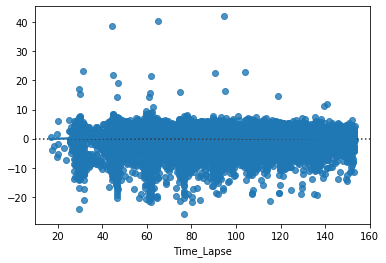

In [93]:
# fig, ax = plt.subplots(figsize=(16,8))
# ax.scatter(y_actuals,y_predictions,lowness=True)

# ax.set_xlabel('actual')
# ax.set_ylabel('y_actuals')
# plt.show()
sns.residplot(y_actuals,y_predictions,lowess=True)



In [98]:
"""Hypothesis testing = Time_lapse vs State & Time_lapse vs sunset_sunrise(AKA day or night)"""

'Hypothesis testing = Time_lapse vs State & Time_lapse vs sunset_sunrise(AKA day or night)'

In [99]:
USA_2019['Time_Lapse']
USA_2019['State']
"""
Hnull = There is no difference in average wait time 
Halt = There is a difference in average wait time 
"""

512232     20
512234     20
512235     31
512236     31
512237     31
           ..
1203547     8
1203575     0
1203589    38
1203591    38
1203594    38
Name: State, Length: 201272, dtype: int8

In [104]:
USA_2019.groupby('State')[['Time_Lapse']].mean()

,Time_Lapse
State,
0,72.589049
1,63.087500
2,61.700598
3,72.419834
4,65.194237
5,67.410528
6,63.539930
7,65.569828
8,72.013016


In [114]:
lr_model = ols(formula= 'Time_Lapse~State', data=USA_2019).fit()

In [115]:
anova_table = sm.stats.anova_lm(lr_model, type=2)
print(anova_table)

                df        sum_sq       mean_sq          F        PR(>F)
State          1.0  2.296562e+04  22965.616830  28.027551  1.197255e-07
Residual  201270.0  1.649195e+08    819.394355        NaN           NaN


In [116]:
mc = MultiComparison(USA_2019['Time_Lapse'], USA_2019['State'])
mc_results = mc.tukeyhsd()
print(mc_results)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     0      1  -9.5015    0.9  -27.3729   8.3698  False
     0      2 -10.8885  0.001  -13.0532  -8.7237   True
     0      3  -0.1692    0.9    -2.035   1.6965  False
     0      4  -7.3948  0.001  -10.1001  -4.6895   True
     0      5  -5.1785 0.0159   -9.9898  -0.3672   True
     0      6  -9.0491  0.001  -14.4669  -3.6313   True
     0      7  -7.0192  0.001  -11.2952  -2.7432   True
     0      8   -0.576    0.9   -2.4754   1.3233  False
     0      9  -8.6234  0.001  -11.3557  -5.8911   True
     0     10  -5.1242 0.4282  -11.4616   1.2132  False
     0     11 -13.8152    0.9  -56.3875   28.757  False
     0     12   -8.002  0.001  -10.2622  -5.7418   True
     0     13   3.5575 0.0169    0.2398   6.8751   True
     0     14  -6.4703    0.9  -16.9172   3.9766  False
     0     15  -4.9924  0.001   -8.1836  -1.8012

In [117]:
"""Based on our chart,we reject the null, there is a statistically significant difference between average delay time of each state."""

'Based on our chart,we reject the null, there is a statistically significant difference between average delay time of each state.'

In [123]:

print('Hnull = There is no difference in delay time during the day or night')
print('Halt  = There is a difference in delay time during the day or night')




Hnull = There is no difference in delay time during the day or night
Halt  = There is a difference in delay time during the day or night


In [2]:
USA_2019.groupby(['Sunrise_Sunset']).head()

NameError: name 'USA_2019' is not defined

In [137]:
stats.ttest_ind(test1, test2)

/Users/andrewghan/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/andrewghan/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Ttest_indResult(statistic=nan, pvalue=nan)